In [28]:
import pandas as pd
from pandas import read_csv as read
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df = read('outputs/test_general.csv')

In [26]:
%matplotlib ipympl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

def create_boxplot(df:pd.DataFrame):
    # Create a figure and an Axes object
    fig, ax = plt.subplots(figsize=(14, 8))

    # Use the Axes object `ax` for the main plots
    g = sns.boxplot(x='MAE', y='Model', data=df, ax=ax, zorder=1, color="white", showfliers=False)
    sns.stripplot(x='MAE', y='Model', data=df, ax=ax, zorder=2, color='#1d95db', size=2, jitter=False, alpha=1)

    plt.subplots_adjust(left=0.18)

    top_six_models = df.groupby('Model').median().nsmallest(6, 'MAE').reset_index()['Model'].unique()
    df_mini = df[df['Model'].isin(top_six_models)]
    axins = inset_axes(ax, width="40%", height="55%", loc='upper right')

    abbreviations = {
        "K Neighbors Regressor": "KNN",
        "Random Forest Regressor":"RF",
        "Decision Tree Regressor":"DT",
        "Light Gradient Boosting Machine":"LGBM",
        "Extra Trees Regressor":"ET",
        "Gradient Boosting Regressor":"GB",
        "AdaBoost Regressor":"ADA"
    }

    df_mini = df_mini[df_mini['Model'].isin(top_six_models)].replace(abbreviations)

    sns.boxplot(x='MAE', y='Model', data=df_mini, ax=axins, zorder=1, color="white", showfliers=False).set_title('Top Six Models')
    sns.stripplot(x='MAE', y='Model', data=df_mini, ax=axins, zorder=2, color='#1d95db', size=2, jitter=False, alpha=1)

    for model in df_mini['Model'].unique():
        subset = df_mini[df_mini['Model'] == model]
        median = subset['MAE'].median()
        Q1 = subset['MAE'].quantile(0.25)
        Q3 = subset['MAE'].quantile(0.75)

        plt.scatter(median, model, color='#142a99', marker='D', s=20, zorder=3)
        plt.scatter(Q1,     model, color='#142a99', marker='s', s=15, zorder=3)
        plt.scatter(Q3,     model, color='#142a99', marker='s', s=15, zorder=3)

        padding = 0.03
        plt.text(median, model, f'{median:.2f}', size=10, color='black', verticalalignment='bottom', horizontalalignment='center')
        plt.text(Q1 - padding, model, f'{Q1:.2f}', size=10, color='black', verticalalignment='top', horizontalalignment='right')
        plt.text(Q3 + padding, model, f'{Q3:.2f}', size=10, color='black', verticalalignment='top', horizontalalignment='left')

    # Remove grid lines
    ax.grid(False)
    axins.grid(False)

    # Draw rectangle
    yticks = ax.get_yticks()
    rect_width = df_mini['MAE'].max() + 0.2  # Gets the max MAE value and adds padding
    rect_height = yticks[0] - yticks[5] - 0.8  # top y-tick - 6th (bottom) y-tick + padding
    # Specifies the starting point of the bottom left corner
    x_start = 0
    y_start = yticks[5] + 0.4
    rect = patches.Rectangle((x_start, y_start), rect_width, rect_height, linewidth=1.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)


In [29]:
plt_df = df[df['Model'] != 'Least Angle Regression']
plt_df = plt_df.groupby('Model').apply(lambda x: x.sort_values('MAE')).reset_index(drop=True)

sns.boxplot(data=plt_df, x='MAE', y='Model')

<AxesHostAxes: title={'center': 'Top Six Models'}, xlabel='MAE', ylabel='Model'>

C:\Users\Build\AppData\Local\Temp\ipykernel_12816\1751658152.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_six_models = df.groupby('Model').median().nsmallest(6, 'MAE').reset_index()['Model'].unique()


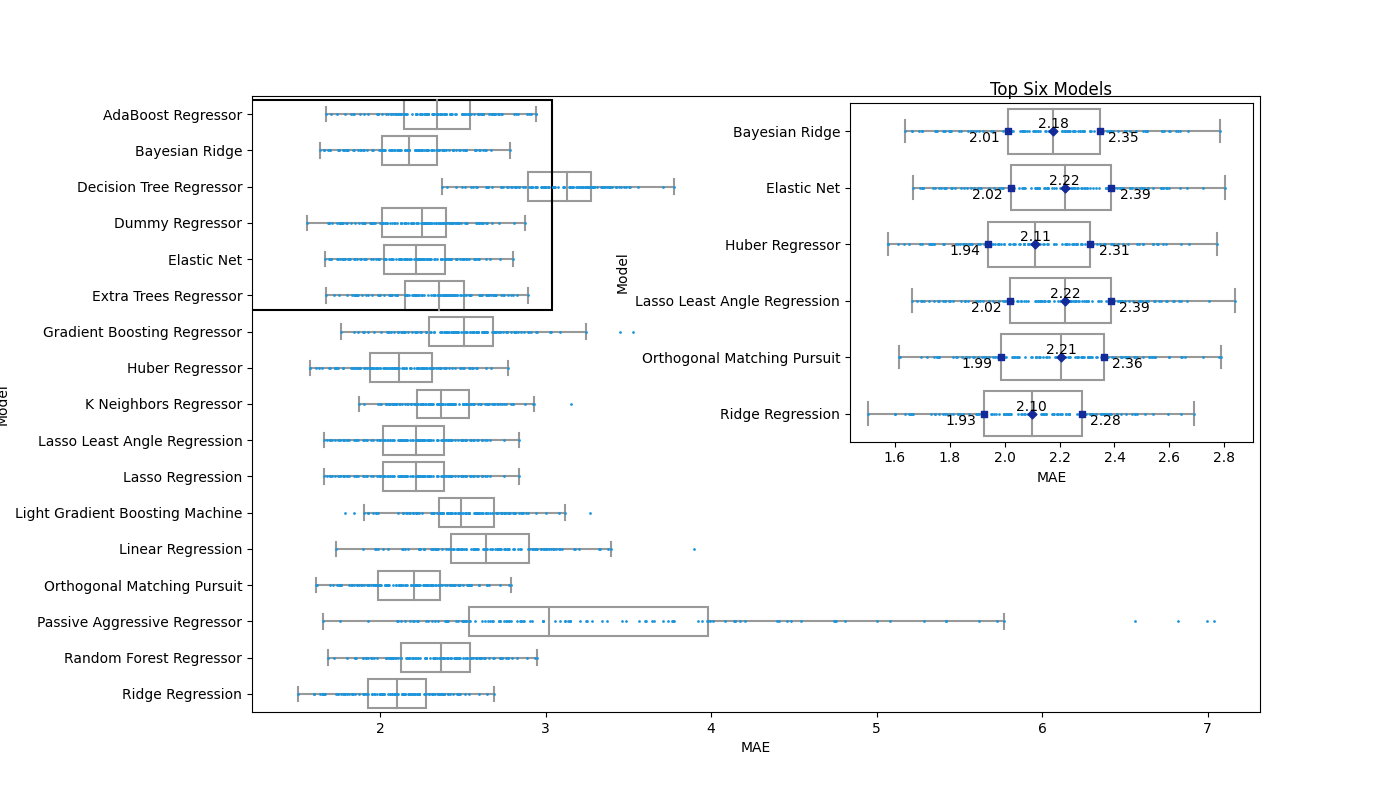

In [30]:
create_boxplot(plt_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,test_set
0,AdaBoost Regressor,1.6730,4.3520,2.0861,0.1559,0.5329,0.4971,"(3, 4, 12)"
1,AdaBoost Regressor,1.7020,4.7447,2.1782,-0.2885,0.5953,0.5926,"(2, 12, 17)"
2,AdaBoost Regressor,1.7395,5.3106,2.3045,-0.3801,0.6165,0.6523,"(2, 4, 12)"
3,AdaBoost Regressor,1.7901,5.0852,2.2550,-0.0379,0.5647,0.5596,"(3, 12, 17)"
4,AdaBoost Regressor,1.8230,5.2940,2.3009,-0.0662,0.5890,0.5515,"(12, 13, 17)"
...,...,...,...,...,...,...,...,...
2035,Ridge Regression,2.5103,9.3912,3.0645,-0.0677,0.7241,0.5799,"(3, 6, 16)"
2036,Ridge Regression,2.5398,9.5283,3.0868,-0.1320,0.7528,0.6778,"(4, 13, 16)"
2037,Ridge Regression,2.5949,10.0325,3.1674,-0.0641,0.7734,0.6943,"(4, 6, 16)"
2038,Ridge Regression,2.6435,10.3410,3.2157,-0.0852,0.7556,0.5339,"(6, 13, 16)"
